<img src="imgs\banner_fcd.jpg" alt="bannersp" width="1100"  height="150">

## <span style="color:#2F749F;"><strong>📦 Sesión práctica 4: Introducción a datos atípicos</strong></span>
---
<p align="right">
  <a href="https://github.com/mariabda2/intro_data_2025/blob/main/sesiones_practicas/sp_4_maria_bernarda_salazar.ipynb?clone=true" target="_blank">
    <img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Abrir en Colab"/>
  </a>
</p>


## <span style="color:black;"><strong>Datos del estudiante</strong></span>

Relacione sus datos y los del compañero de trabajo

Sebastián Flórez Jaramillo cc: 1040750946

# <span style="color:#2F749F;"><strong>Ejercicio 1: Intervalo IQR</strong></span>

A partir de siguiente código:

1. Ajusta el código para mejorar la interpretación de la gráfica. Mínimo debes:
   - Indicar los nombres de los ejes
   - Incluir legenda para comprender lo que esté incluído en la gráfica
2. Generar máximo 5 líneas de análisis sobre lo que observas en términos de defición de atípicos sobre tú gráfica final

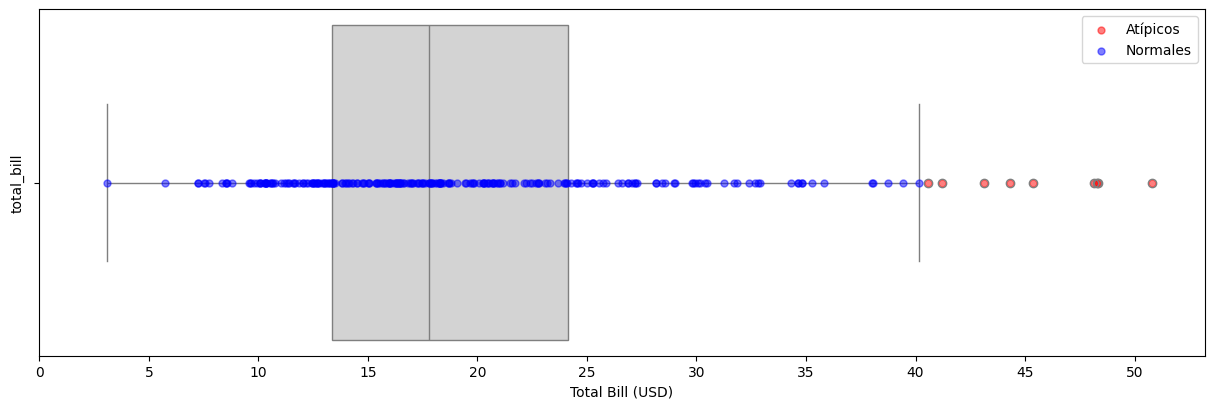

In [89]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

tips = sns.load_dataset("tips")
total_bill = tips["total_bill"].values
Q1, Q3 = np.percentile(total_bill, [25, 75])
IQR = Q3 - Q1
lim_inf = Q1 - 1.5 * IQR
lim_sup = Q3 + 1.5 * IQR
data_a = total_bill[(total_bill < lim_inf) | (total_bill > lim_sup)]
data_b = total_bill[(total_bill >= lim_inf) & (total_bill <= lim_sup)]

plt.figure(figsize=(12,4))
sns.boxplot(x=total_bill, color="lightgray")
plt.scatter(data_a, [0.0]*len(data_a), color="red", s=25, alpha=0.5, label="Atípicos")
plt.scatter(data_b, [0.0]*len(data_b), color="blue", s=25, zorder=5, alpha=0.5, label="Normales")
plt.xticks([i for i in range(0,55,5)])
plt.tight_layout()
plt.xlabel("Total Bill (USD)")
plt.ylabel("total_bill")
plt.legend()
plt.show()


Mediante la grafica de boxplot podemos ver aquellos datos cuyo valor supera el límite superior y que son considerados atípicos. Además, observamos que hay un grupo de valores cercanos al límite superior y que el valor mínimo del dataset está solo y algo alejado del punto mas próximo, estos tambien podrían ser candidatos a datos atípicos.

# <span style="color:#2F749F;"><strong>Ejercicio 2: Graficos de dispersión</strong></span>

A partir de siguiente código:

1. Ajusta el código para mejorar la interpretación de la gráfica. Mínimo debes:
   - Indicar los nombres de los ejes
   - Incluir legenda para comprender lo que esté incluído en la gráfica
2. Generar máximo 5 líneas de análisis sobre lo que observas en términos de defición de atípicos sobre tú gráfica final

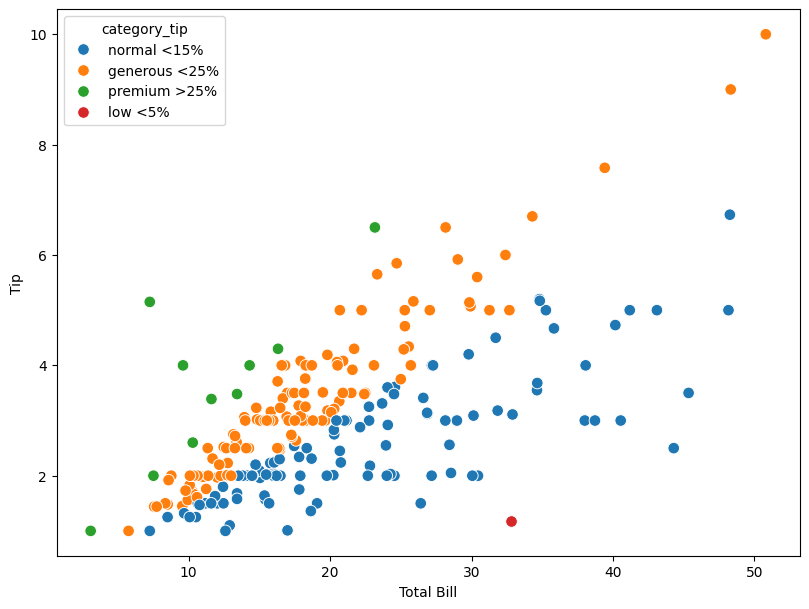

In [2]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

tips = sns.load_dataset("tips")

def def_category_tip(bill,tip):
  value = tip / bill
  category = ""
  match value:
    case value if value < 0.05:
      category = "low <5%"
    case value if value < 0.15:
      category = "normal <15%"
    case value if value <= 0.25:
      category = "generous <25%"
    case value if value > 0.25:
      category = "premium >25%"
  return category

tips["category_tip"] = tips.apply(lambda x: def_category_tip(x["total_bill"], x["tip"]), axis=1)

x = tips["total_bill"].values
y = tips["tip"].values
z = y/x
plt.figure(figsize=(8,6))
sns.scatterplot(data=tips, x=x, y=y, s=70, hue="category_tip")
plt.tight_layout()
plt.xlabel("Total Bill")
plt.ylabel("Tip")
plt.show()


En esta gráfica podemos ver los registros atípicos según el porcentaje del total de la cuenta que representa la propina. Podemos ver que hay solo un valor categorizado como low (menor al 5%) y 10 valores como premium (mayor al 25%). Esto nos diría cuales registros tienen datos atípicos orientados en esta relación. Además, la gráfica nos muestra tambien los valores de total_bill y tip que son particularmente altos o bajos entre los demás, aunque la gráfica muestra que los mas altos son los menos usuales.

# <span style="color:#2F749F;"><strong>Ejercicio 3: Histogramas y funciones de densidad</strong></span>

A partir de siguiente código:

1. Ajusta el código para mejorar la interpretación de la gráfica. Mínimo debes:
   - Indicar los nombres de los ejes
   - Incluir legenda para comprender lo que esté incluído en la gráfica
2. Generar máximo 5 líneas de análisis sobre lo que observas en términos de defición de atípicos sobre tú gráfica final

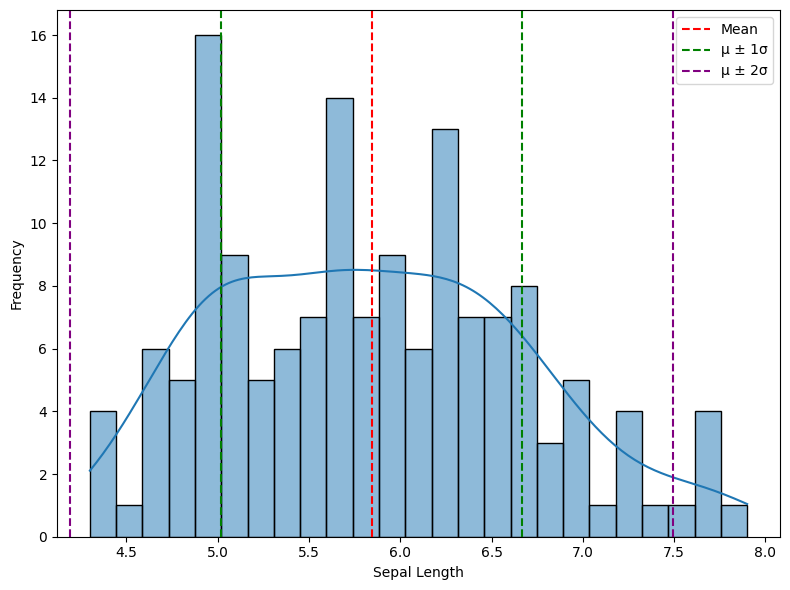

In [106]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

iris = sns.load_dataset("iris")
x = iris["sepal_length"].values
plt.figure(figsize=(8,6))
sns.histplot(x=x, bins=25, kde=True)
plt.axvline(x=np.mean(x), color="red", linestyle="--", label="Mean")
plt.axvline(x=np.mean(x)+1*np.std(x), color="green", linestyle="--", label="μ ± 1σ")
plt.axvline(x=np.mean(x)+2*np.std(x), color="purple", linestyle="--", label="μ ± 2σ")
plt.axvline(x=np.mean(x)-1*np.std(x), color="green", linestyle="--")
plt.axvline(x=np.mean(x)-2*np.std(x), color="purple", linestyle="--")
plt.xlabel("Sepal Length")
plt.ylabel("Frequency")
plt.legend()
plt.tight_layout()
plt.show()


Esta gráfica nos muestra la cantidad de valores que hay por intervalo y permite observar aquellos que están mas de 2 desviaciones estandar a la derecha, por lo que son candidatos a atípicos.

# <span style="color:#2F749F;"><strong>Ejercicio 4: Z-Score</strong></span>

A partir de siguiente código:

1. Ajusta el código para mejorar la interpretación de la gráfica. Mínimo debes:
   - Indicar los nombres de los ejes
   - Incluir legenda para comprender lo que esté incluído en la gráfica
2. Generar máximo 5 líneas de análisis sobre lo que observas en términos de defición de atípicos sobre tú gráfica final

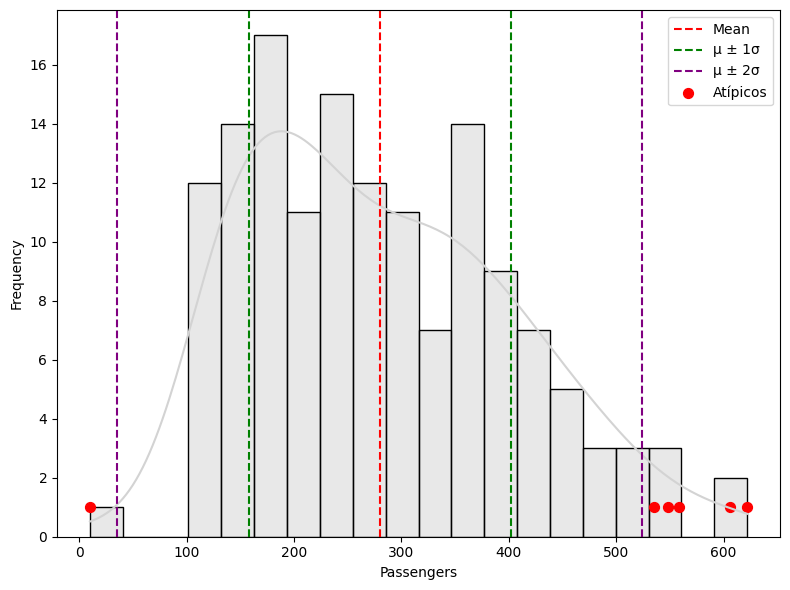

In [111]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import zscore

flights = sns.load_dataset("flights")
x = flights["passengers"].values

x = np.append(x, [10, 500])

z_scores = zscore(x)
data_b = np.abs(z_scores) > 2

plt.figure(figsize=(8,6))
sns.histplot(x=x, bins=20, kde=True, color="lightgray")
plt.axvline(x=np.mean(x), color="red", linestyle="--", label="Mean")
plt.axvline(x=np.mean(x)+1*np.std(x), color="green", linestyle="--", label="μ ± 1σ")
plt.axvline(x=np.mean(x)+2*np.std(x), color="purple", linestyle="--", label="μ ± 2σ")
plt.axvline(x=np.mean(x)-1*np.std(x), color="green", linestyle="--")
plt.axvline(x=np.mean(x)-2*np.std(x), color="purple", linestyle="--")
plt.scatter(x[data_b], np.zeros_like(x[data_b])+1, color="red", s=50, marker="o", label="Atípicos")
plt.xlabel("Passengers")
plt.ylabel("Frequency")
plt.legend()
plt.tight_layout()
plt.show()


Igual que en la gráfica anterior, observamos aquellos valores que están mas de 2 desviaciones estandar a la derecha o a la izquierda de la media y son considerados atípicos. En este caso aunque la gráfica separa por intervalos, los outliers están graficados explicitamente.

# <span style="color:#2F749F;"><strong>Ejercicio 5: K-means</strong></span>

A partir de siguiente código:

1. Ajusta el código para mejorar la interpretación de la gráfica. Mínimo debes:
   - Indicar los nombres de los ejes
   - Incluir legenda para comprender lo que esté incluído en la gráfica
2. Generar máximo 5 líneas de análisis sobre lo que observas en términos de defición de atípicos sobre tú gráfica final

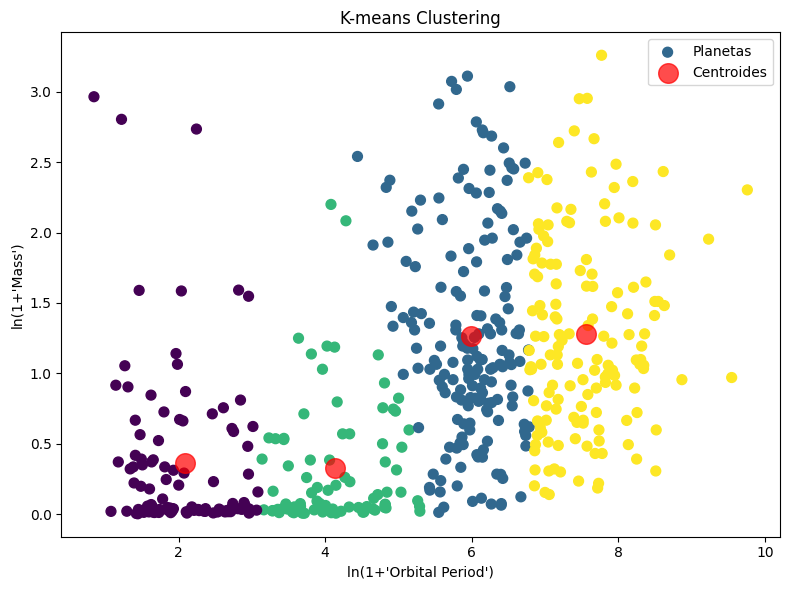

In [115]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import numpy as np

planets = sns.load_dataset("planets").dropna(subset=["orbital_period", "mass"])
X = planets[["orbital_period", "mass"]].values
X = np.log1p(X)

kmeans = KMeans(n_clusters=4, random_state=42).fit(X)
labels = kmeans.labels_

plt.figure(figsize=(8,6))
plt.scatter(X[:,0], X[:,1], c=labels, cmap="viridis", s=50, label="Planetas")
plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], c="red", s=200, alpha=0.7, label="Centroides")
plt.legend()
plt.xlabel("ln(1+'Orbital Period')")
plt.ylabel("ln(1+'Mass')")
plt.title("K-means Clustering")
plt.tight_layout()
plt.show()


En esta gráfica se observan los centroides y los planetas asignados al cluster correspondiente. Así, los planetas candidatos a atípicos serán aquellos muy alejados de su centro de masa correspondiente.